In [44]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('ams8.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,0,MLP
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,0,MLP
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,0,MLP
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,0,MLP
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,0,MLP


In [46]:
len(df)

18463

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18463 entries, 0 to 18462
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18463 non-null  int64  
 1   N_Person           18463 non-null  int64  
 2   Xcenter            18463 non-null  float64
 3   Ycenter            18463 non-null  float64
 4   PerXmin            18463 non-null  float64
 5   PerYmin            18463 non-null  float64
 6   PerXmax            18463 non-null  float64
 7   PerYmax            18463 non-null  float64
 8   N_Handgun          18463 non-null  int64  
 9   HgXcenter          18463 non-null  float64
 10  HgYcenter          18463 non-null  float64
 11  HgXmin             18463 non-null  float64
 12  HgYmin             18463 non-null  float64
 13  HgXmax             18463 non-null  float64
 14  HgYmax             18463 non-null  float64
 15  Intersection       18463 non-null  object 
 16  Included_Center    184

In [48]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14219
Ycenter              14200
PerXmin              14227
PerYmin              14224
PerXmax              14227
PerYmax              14204
N_Handgun                5
HgXcenter             7301
HgYcenter             7299
HgXmin                7303
HgYmin                7303
HgXmax                7303
HgYmax                7302
Intersection             9
Included_Center          2
Intersection_Area     8434
Hg_Area               7303
Distance             18463
Ground_Truth             2
GT                       2
dtype: int64

In [49]:
df['Ground_Truth'].value_counts()

0    17575
1      888
Name: Ground_Truth, dtype: int64

In [50]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,MLP,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,MLP,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,MLP,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,MLP,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,MLP,1,0,0,0,0,0,0,0,0


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18463 entries, 0 to 18462
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18463 non-null  int64  
 1   N_Person                      18463 non-null  int64  
 2   Xcenter                       18463 non-null  float64
 3   Ycenter                       18463 non-null  float64
 4   PerXmin                       18463 non-null  float64
 5   PerYmin                       18463 non-null  float64
 6   PerXmax                       18463 non-null  float64
 7   PerYmax                       18463 non-null  float64
 8   N_Handgun                     18463 non-null  int64  
 9   HgXcenter                     18463 non-null  float64
 10  HgYcenter                     18463 non-null  float64
 11  HgXmin                        18463 non-null  float64
 12  HgYmin                        18463 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [52]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{0: 'MLP', 1: 'RFC'}


In [53]:
print(df2['Ground_Truth'].value_counts())

0    17575
1      888
Name: Ground_Truth, dtype: int64


In [54]:
df3 = df2.drop(columns=["GT"])

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18463 entries, 0 to 18462
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18463 non-null  int64  
 1   N_Person                      18463 non-null  int64  
 2   Xcenter                       18463 non-null  float64
 3   Ycenter                       18463 non-null  float64
 4   PerXmin                       18463 non-null  float64
 5   PerYmin                       18463 non-null  float64
 6   PerXmax                       18463 non-null  float64
 7   PerYmax                       18463 non-null  float64
 8   N_Handgun                     18463 non-null  int64  
 9   HgXcenter                     18463 non-null  float64
 10  HgYcenter                     18463 non-null  float64
 11  HgXmin                        18463 non-null  float64
 12  HgYmin                        18463 non-null  float64
 13  H

In [56]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14770, 28) (14770,)
(3693, 28) (3693,)


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.970119611825773
mean_test =  0.9687880839539608


,fit_time,score_time,test_score,train_score
0,0.145612,0.005030,0.976980,0.970586
1,0.138705,0.003982,0.969533,0.971188
2,0.138586,0.005996,0.970887,0.972391
3,0.132490,0.005030,0.963439,0.969533
4,0.144122,0.006941,0.970887,0.970511
5,0.174533,0.005985,0.970210,0.970059
6,0.131646,0.005067,0.964116,0.969683
7,0.129711,0.004936,0.967502,0.970887
8,0.142675,0.004062,0.969533,0.968630
9,0.127694,0.003985,0.964794,0.967727


                         feature  importance       std
27         Intersection_Up_right    0.000000  0.000000
25        Intersection_Up_center    0.000000  0.000000
23           Intersection_Inside    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
8                      N_Handgun    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
15               Included_Center    0.000085  0.000254
1                       N_Person    0.000433  0.000901
11                        HgXmin    0.003638  0.009120
16             Intersection_Area    0.008956  0.019596
2                        Xcenter    0.010394  0.014188
19      Intersection_Center_left    0.011297  0.033890
13                        HgXmax    0.013518  0.022424
17                       Hg_Area    0.016181  0.029847
4                        PerXmin    0.021388  0.039126
6                        PerXmax    0.025563  0.067669
9         

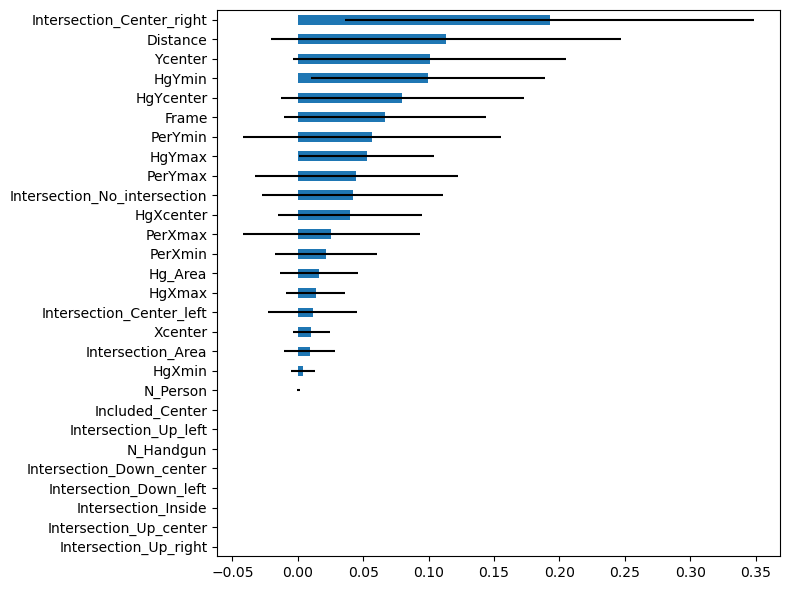

In [59]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3528
           1       0.91      0.37      0.53       165

    accuracy                           0.97      3693
   macro avg       0.94      0.68      0.76      3693
weighted avg       0.97      0.97      0.96      3693



In [61]:
from sklearn.metrics import accuracy_score
print("Score test = ", accuracy_score(y_test,predictions))

Score train =  0.9702139182236664


In [62]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions, average='macro')

0.9408830091132863

In [63]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions, average='macro')

0.6839981447124305

In [65]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='macro')

0.7552430277732254

In [18]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [19]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18463 entries, 0 to 18462
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18463 non-null  int64  
 1   N_Person                      18463 non-null  int64  
 2   Xcenter                       18463 non-null  float64
 3   Ycenter                       18463 non-null  float64
 4   PerXmin                       18463 non-null  float64
 5   PerYmin                       18463 non-null  float64
 6   PerXmax                       18463 non-null  float64
 7   PerYmax                       18463 non-null  float64
 8   N_Handgun                     18463 non-null  int64  
 9   HgXcenter                     18463 non-null  float64
 10  HgYcenter                     18463 non-null  float64
 11  HgXmin                        18463 non-null  float64
 12  HgYmin                        18463 non-null  float64
 13  H

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86655931, -1.0070482 ,  0.38579739, -1.05768312,  0.40690805,
        -0.80175599,  0.3490977 , -1.42444496, -0.49743562,  0.64906485,
        -1.25764863,  0.70161332, -1.17665053,  0.59510104, -1.333981  ,
         1.17572215, -0.04959714, -0.63161158, -0.6978181 ,  2.66684058,
        -0.28064447, -0.01645859, -0.01040848, -0.53930332, -1.08654657,
        -0.11997839, -0.06169113, -0.13778823],
       [-1.86438852, -1.0070482 ,  0.38551189, -1.05709323,  0.40592667,
        -0.80006758,  0.34954299, -1.42718941, -0.49743562,  0.6474696 ,
        -1.2585021 ,  0.69861164, -1.17730133,  0.59490005, -1.33503905,
         1.17572215, -0.04717499, -0.62569888, -0.69639026,  2.66684058,
        -0.28064447, -0.01645859, -0.01040848, -0.53930332, -1.08654657,
        -0.11997839, -0.06169113, -0.13778823],
       [-1.86221774, -1.0070482 ,  0.38613191, -1.05924539,  0.40739451,
        -0.80412046,  0.34926217, -1.42318409, -0.49743562,  0.64729099,
        -1.25991514,  0.6985

In [22]:
print(scaler.mean_)

[8.59853112e+02 8.80246980e-01 3.93099740e+02 3.82412786e+02
 3.05841375e+02 2.46141187e+02 4.80358105e+02 5.18684385e+02
 2.99030493e-01 3.10622080e+02 3.12410656e+02 2.87259574e+02
 2.92872541e+02 3.33984585e+02 3.31948771e+02 4.19758436e-01
 9.27397412e+02 2.02297112e+03 2.32075899e+02 1.23273574e-01
 7.30108866e-02 2.70811894e-04 1.08324758e-04 2.25315496e-01
 5.41407139e-01 1.41905432e-02 3.79136652e-03 1.86318583e-02]


In [23]:
print(scaler.scale_)

[4.60662088e+02 8.74086243e-01 2.12286845e+02 6.88579007e+01
 2.20039580e+02 1.11927398e+02 2.12729975e+02 3.92582504e+01
 6.01144112e-01 1.52927569e+02 9.72948205e+01 1.52227439e+02
 9.92282433e+01 1.54116716e+02 9.59297255e+01 4.93519292e-01
 1.66284209e+03 1.80722287e+03 1.37507191e+02 3.28750970e-01
 2.60154372e-01 1.64541349e-02 1.04073543e-02 4.17789927e-01
 4.98282499e-01 1.18275829e-01 6.14572376e-02 1.35220975e-01]


In [24]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [25]:
X_train.shape

(13847, 28)

In [26]:
y_train.value_counts()

0    13181
1      666
Name: Ground_Truth, dtype: int64

In [27]:
X_test.shape

(4616, 28)

In [28]:
y_test.value_counts()

0    4394
1     222
Name: Ground_Truth, dtype: int64

In [29]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[1.00000000e+00, 2.98519529e-10],
       [9.99999557e-01, 4.43446941e-07],
       [9.99999801e-01, 1.98949106e-07],
       ...,
       [9.99999997e-01, 3.07190869e-09],
       [9.99999995e-01, 4.53949258e-09],
       [1.00000000e+00, 2.29287287e-10]])

In [30]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4394
           1       0.96      0.92      0.94       222

    accuracy                           0.99      4616
   macro avg       0.98      0.96      0.97      4616
weighted avg       0.99      0.99      0.99      4616



In [33]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.995522495847476
Score test =  0.994367417677643


In [40]:
from sklearn.metrics import accuracy_score
print("Score test = ", accuracy_score(y_test,predictions_mlp))

Score train =  0.994367417677643


In [41]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions_mlp, average='macro')

0.9790884787414529

In [42]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions_mlp, average='macro')

0.9585491271881805

In [43]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions_mlp, average='macro')

0.9685684744019116

In [34]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 